In [ ]:
from pyforest import *
%matplotlib inline
from pandas_profiling import ProfileReport
from datetime import datetime

### Data Propressing

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
feature= pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [3]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [4]:
print(train.info())
print(test.info())
print(feature.info())
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2    

In [5]:
#Merging Train dataset
train_s = pd.merge(train,stores)
train = pd.merge(train_s,feature)

In [6]:
# Merging Test dataset
test_bt = pd.merge(test,stores)
test= pd.merge(test_bt,feature)

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None


In [8]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB
None


In [9]:
#Spliting numeric data
num_var_train = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in['float64','int64','float32','int32']]
###Train Numeric Data
train_num = train[num_var_train]
###Spliting Categorical data
cat_var_train = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
###Train Categorical Data
train_cat = train[cat_var_train]

In [10]:
print(num_var_train)
print(cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [11]:
train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [12]:
#Creating Data Audit Report for train dataset
def  var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index = ['N',"NMISS","SUM",'MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','MAX'])
num_summary = train_num.apply(lambda x: var_summary(x)).T
num_summary.to_csv('numeric_variable_summary.csv')
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [13]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()],
                     index=['N','NMISS','ColumnsName'])
cat_summary = train_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,421570,421570
NMISS,0,0
ColumnsName,2011-12-23 3027 2011-11-25 3021 2011-12-...,A 215478 B 163495 C 42597 Name: Type...


In [14]:
#Spliting numeric data
num_var_test = [key for key in dict(test.dtypes) if dict(test.dtypes)[key] in['float64','int64','float32','int32']]
###Test Numeric Data
test_num = test[num_var_test]
###Spliting Categorical data
cat_var_test = [key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
###Train Categorical Data
test_cat = test[cat_var_test]

In [15]:
#Creating Data Audit Report for test dataset
def  var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index = ['N',"NMISS","SUM",'MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','MAX'])
num_summary = test_num.apply(lambda x: var_summary(x)).T
num_summary.to_csv('numeric_variable_summary_test.csv')
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,1.000000,1.000000,3.0000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,1.000000,1.000000,4.0000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000000,34875.000000,39690.0000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290000,11.440000,23.9800,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872000,2.957000,3.1610,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000,4.079000,4.125000
MarkDown1,114915.0,149.0,8.836063e+08,7689.216439,4842.290000,10698.760716,1.144635e+08,-2781.450000,20.840000,189.4900,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,86437.0,28627.0,3.227602e+08,3734.051729,742.590000,8323.495014,6.928057e+07,-35.740000,0.020000,6.1400,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000,42920.210000,71074.170000
MarkDown3,105235.0,9829.0,2.528890e+08,2403.088666,78.260000,13767.939313,1.895562e+08,-179.260000,0.150000,1.1800,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000,86476.660000,149483.310000
MarkDown4,102176.0,12888.0,3.429250e+08,3356.219071,840.940000,7570.501545,5.731249e+07,0.220000,2.610000,16.9600,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000,44739.280000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170000,269.300000,540.8900,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000,18599.300000,771448.100000


In [16]:
ProfileReport(train)

Number of variables,16
Number of observations,421570
Total Missing (%),21.1%
Total size in memory,51.9 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [17]:
ProfileReport(test)

Number of variables,15
Number of observations,115064
Total Missing (%),7.4%
Total size in memory,13.3 MiB
Average record size in memory,121.0 B
Numeric,12
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Correlation

In [18]:
train_corr = pd.DataFrame(train.corr())
train_corr.to_csv('train_data_corr.csv',index = True)
train_corr

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


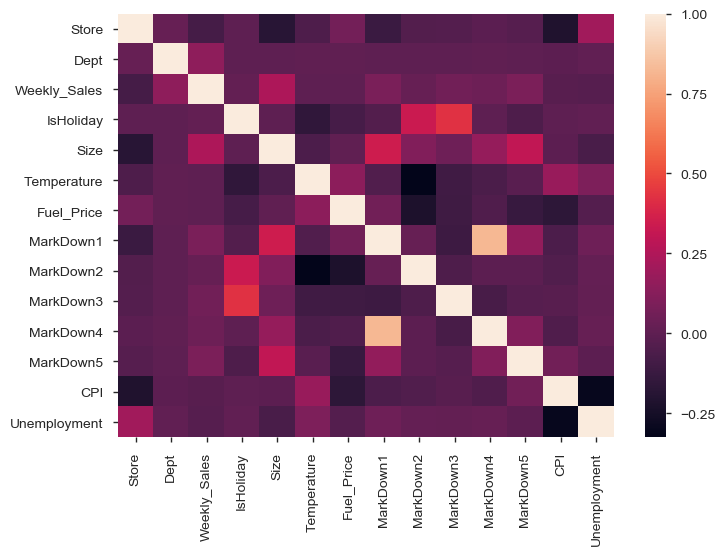

In [19]:
sns.heatmap(train.corr())

In [20]:
test_corr = pd.DataFrame(test.corr())
test_corr

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


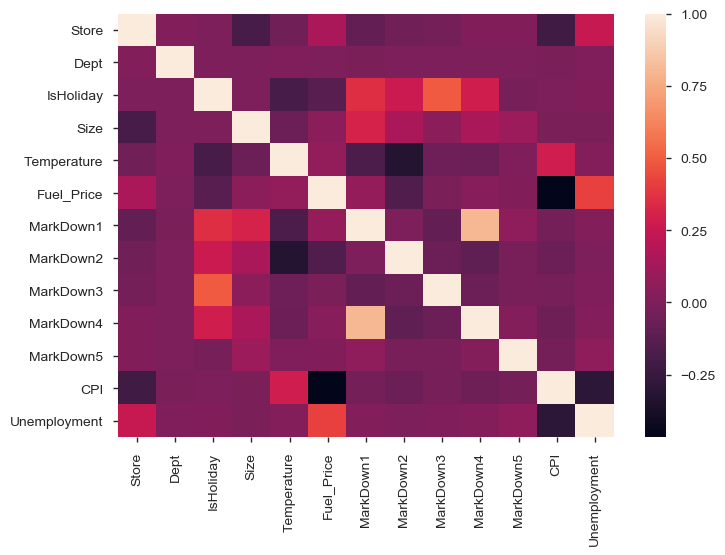

In [21]:
sns.heatmap(test.corr())

## Data Exploratory Analysis

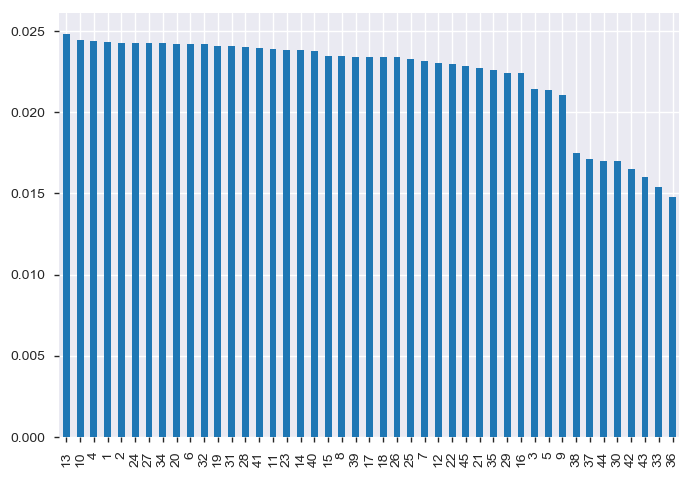

In [22]:
train['Store'].value_counts(normalize = True).plot(kind = 'bar',fig = (4,5))

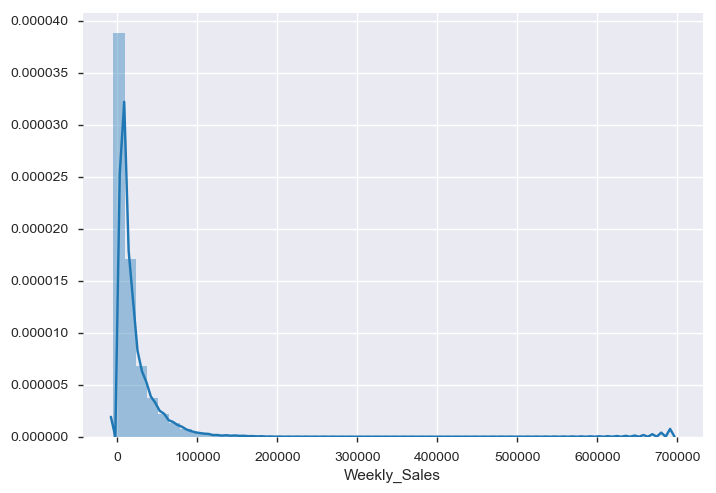

In [23]:
#Distribution of Weekly Sales
sns.distplot(train.Weekly_Sales)

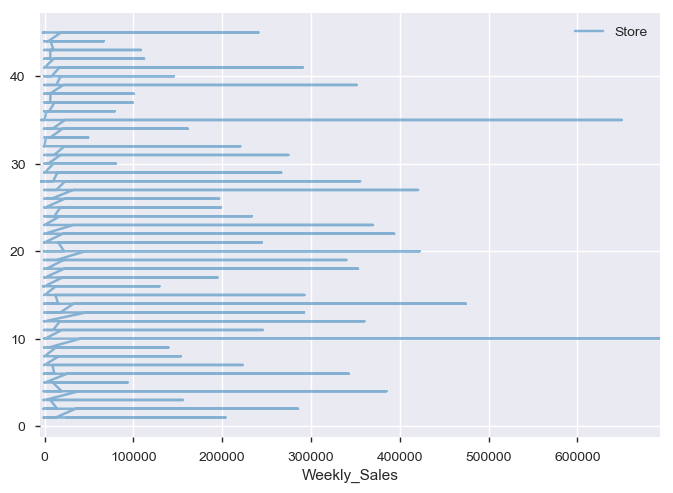

In [24]:
##Store Size v/s Sales
train.plot(kind ='line',x='Weekly_Sales',y = 'Store',alpha = 0.5)

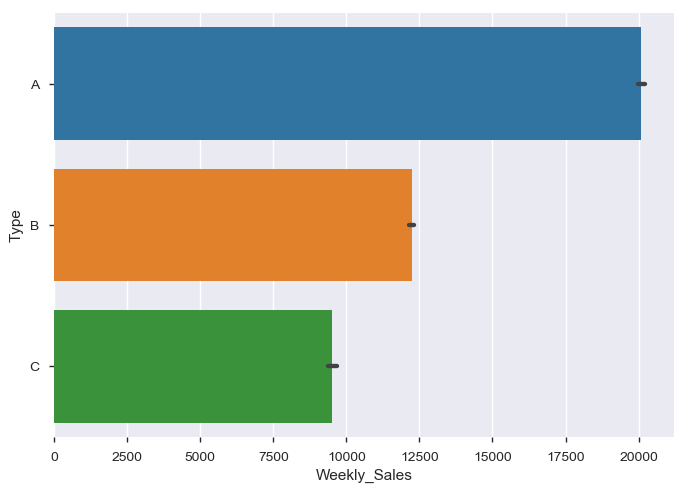

In [25]:
#sales v/s Type
sns.barplot(x= train['Weekly_Sales'],y = train['Type'])

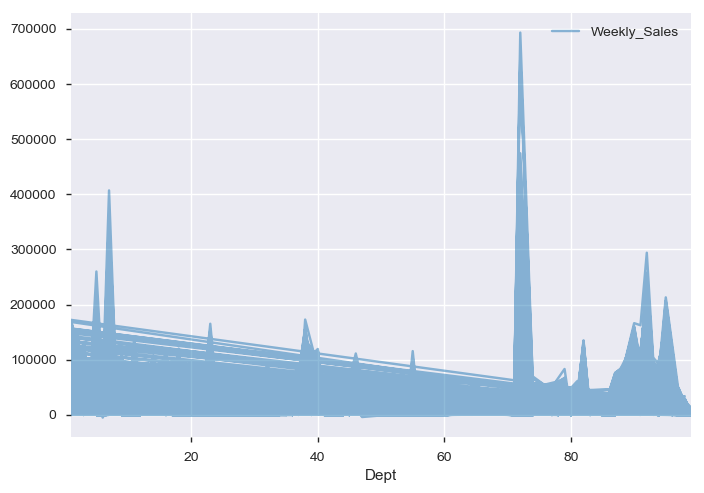

In [26]:
## plot Sales v/s Department 
train.plot(kind = 'line',x='Dept',y = 'Weekly_Sales',alpha = 1.5,fig = (4,5))

### Missing Value Treatment 


In [27]:
print(train.isnull().sum())
print('-'*25)
print (test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
-------------------------
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [28]:
test.CPI = test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test.Unemployment = test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [29]:
train = train.fillna(0)
test = test.fillna(0)

In [30]:
print(train.isnull().sum())
print('-'*25)
print (test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
-------------------------
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


## Outlier Treatment

In [31]:
train.Weekly_Sales = np.where(train.Weekly_Sales>100000,100000,train.Weekly_Sales)

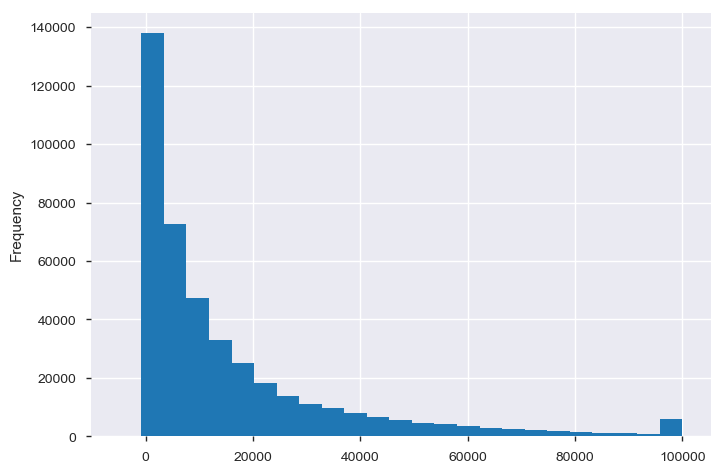

In [32]:
train.Weekly_Sales.plot.hist(bins=25)

## Feature Extraction

In [33]:
#Creating new features to train.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 71.9+ MB


In [34]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [35]:
####Extract date features
train['Day_dayofweek']= train['Date'].dt.dayofweek
train['Date_month'] = train['Date'].dt.month
train['Date_year'] = train['Date'].dt.year
train['Date_day'] = train['Date'].dt.day

test['Day_dayofweek']= train['Date'].dt.dayofweek
test['Date_month'] = train['Date'].dt.month
test['Date_year'] = train['Date'].dt.year
test['Date_day'] = train['Date'].dt.day

In [36]:
print(train.Type.value_counts())
print('-'*25)
print(test.Type.value_counts())

A    215478
B    163495
C     42597
Name: Type, dtype: int64
-------------------------
A    58713
B    44500
C    11851
Name: Type, dtype: int64


In [37]:
print(train.IsHoliday.value_counts())
print('-'*25)
print(test.IsHoliday.value_counts())

False    391909
True      29661
Name: IsHoliday, dtype: int64
-------------------------
False    106136
True       8928
Name: IsHoliday, dtype: int64


In [38]:
data = [train,test]

### Converting Categorical variable 'Type' into Numeric varables

In [39]:
type_mapping = {'A':1,"B":2,'C':3}
for dataset in data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

## Converting  Categorical Variable

In [40]:
type_mapping = {False: 0 , True: 1}
for dataset in data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

### Creating Extra Holiday Variable

In [41]:
### Making New Holiday Variable Based on Given Data..
train['super_bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']== datetime(2011,2,11)) | (train['Date']== datetime(2012,2,10)) | (train['Date']== datetime(2013,2,8)),1,0)
train['labour_day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']== datetime(2011,9,9)) | (train['Date']== datetime(2012,9,7)) | (train['Date']== datetime(2013,9,6)),1,0)
train['thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']== datetime(2011,11,25)) | (train['Date']== datetime(2012,11,23)) | (train['Date']== datetime(2013,11,29)),1,0)
train['christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']== datetime(2011,12,30)) | (train['Date']== datetime(2012,12,28)) | (train['Date']== datetime(2013,12,27)),1,0)

In [42]:
### Making New Holiday Variable Based on Given Data..
test['super_bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']== datetime(2011,2,11)) | (test['Date']== datetime(2012,2,10)) | (test['Date']== datetime(2013,2,8)),1,0)
test['labour_day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']== datetime(2011,9,9)) | (test['Date']== datetime(2012,9,7)) | (test['Date']== datetime(2013,9,6)),1,0)
test['thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']== datetime(2011,11,25)) | (test['Date']== datetime(2012,11,23)) | (test['Date']== datetime(2013,11,29)),1,0)
test['christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']== datetime(2011,12,30)) | (test['Date']== datetime(2012,12,28)) | (test['Date']== datetime(2013,12,27)),1,0)

In [43]:
# Altering the holidays values depending on these new holidays

train['IsHoliday'] = train['IsHoliday']| train ['super_bowl']|train['labour_day']|train['thanksgiving']|train['christmas']
test.IsHoliday = test.IsHoliday|test['super_bowl']|test['labour_day']|test['thanksgiving']|test['christmas']

In [44]:
print(train.super_bowl.value_counts())
print(train.labour_day.value_counts())
print(train.thanksgiving.value_counts())
print(train.christmas.value_counts())

0    412675
1      8895
Name: super_bowl, dtype: int64
0    412709
1      8861
Name: labour_day, dtype: int64
0    415611
1      5959
Name: thanksgiving, dtype: int64
0    415624
1      5946
Name: christmas, dtype: int64


In [45]:
print(test.super_bowl.value_counts())
print(test.labour_day.value_counts())
print(test.thanksgiving.value_counts())
print(test.christmas.value_counts())

0    112100
1      2964
Name: super_bowl, dtype: int64
0    115064
Name: labour_day, dtype: int64
0    112088
1      2976
Name: thanksgiving, dtype: int64
0    112076
1      2988
Name: christmas, dtype: int64


In [46]:
#we have Imputed Holidays according to Extra holidays.These extra holidays has redundant..
##Droping the extra holidays valiable has redundant.
x = ['super_bowl','labour_day','thanksgiving','christmas']
train.drop(x,axis=1,inplace=True)
test.drop(x,axis=1,inplace=True)

## Classification & Accuracy
* Defining training and testing dataset

In [47]:
train_X = train.drop(['Weekly_Sales','Date'],axis=1)
train_y = train['Weekly_Sales']

In [48]:
test_X = test.drop('Date',axis=1).copy()
train_X.shape,train_y.shape,test_X.shape

((421570, 18), (421570,), (115064, 18))

## Building Models

### Linear Regression

In [49]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
l_reg = LinearRegression()
l_reg.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
y_pred =l_reg.predict(test_X)
acc_reg = round(l_reg.score(train_X,train_y)* 100,2)
print('Accuracy of Linear Regression:' +str(acc_reg)+'%')

Accuracy of Linear Regression:8.99%


### Random Forest

In [ ]:
reg = RandomForestRegressor(n_estimators=100)
reg.fit(train_X,train_y)
y_pred_rf = reg.predict(test_X)
acc_rf = round(reg.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest: '+str(acc_rf)+'%')

In [ ]:
indices = np.argsort(reg.feature_importances_)[::-1]
feature_rank= pd.DataFrame(columns=['rank','feature','importance'])

for f in range(train_X.shape[1]):
 feature_rank.loc[f]=[f+1,
                      train_X.columns[indices[f]],
                      reg.feature_importances_[indices[f]]]

sns.barplot(y='feature',x='importance',data = feature_rank)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestRegressor(random_state=11)

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), samplecols)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

In [ ]:
list(feature_rank.feature[0:10])
top10 = list(feature_rank.feature[0:10])
top10

### Decision Tree

In [ ]:
reg = DecisionTreeRegressor()
reg.fit(train_X,train_y)
y_pred_dt = reg.predict(test_X)
acc_dt = round(reg.score(train_X,train_y)*100,2)
print("Accuracy of Decision Tree: "+str(acc_dt)+'%')

### Comparing Models
Let's compare the accuracy of all models used above.

In [ ]:
models = pd.DataFrame({'Model':['Linear Regression','Random Forest','Decision Tree'],
                      'Score':[acc_reg,acc_rf,acc_dt]})
models.sort_values(by='Score',ascending= False)

#### Predicting Sales value for test data based on highest score model

In [ ]:
#Predicting values
submission = pd.DataFrame({
    'Store_Dept_Date': test.Store.astype(str)+'_'+ test.Dept.astype(str)+'_'+test.Date.astype(str),
    'Weekly_Sales': y_pred_dt})
submission.to_csv('weekly_sales Predicted.csv',index=False)
# submission.to_excel(writer,'Weekly_sales Pred',index = False)

In [ ]:
submission.head()